**CSI 4506 Introduction à l'intelligence artificielle** <br/>
*Devoir 2: apprentissage automatique*

# Identification

Nom: Adam Jeribi <br/>
Numéro d'étudiant : 300278715


# 1. Analyse exploratoire

## Exploration des données

Dans ce devoir, nous utiliserons le jeu de données de prédiction du diabète, accessible via [Diabetes Prediction Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data). Pour réduire la complexité liée à l'exigence de connexion de Kaggle, le jeu de données a été mis à disposition sur un dépôt GitHub public :

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2)

Vous pouvez accéder et lire le jeu de données directement depuis ce dépôt GitHub dans votre notebook Jupyter.
## Importer les bibliothèques importantes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score



### Description du jeu : 
 - L'ensemble de données de prédiction du diabète est une collection de données médicales et démographiques de patients, ainsi que leur statut diabétique (positif ou négatif). Les données comprennent des caractéristiques telles que l'âge, le sexe, l'indice de masse corporelle (IMC), l'hypertension, les maladies cardiaques, les antécédents de tabagisme, le taux d'HbA1c et la glycémie. Cet ensemble de données peut être utilisé pour construire des modèles d'apprentissage automatique afin de prédire le diabète chez les patients sur la base de leurs antécédents médicaux et de leurs informations démographiques. Les professionnels de la santé peuvent ainsi identifier les patients susceptibles de développer un diabète et élaborer des plans de traitement personnalisés. En outre, l'ensemble de données peut être utilisé par les chercheurs pour explorer les relations entre divers facteurs médicaux et démographiques et la probabilité de développer un diabète.


1. **Charger le jeu de données et fournir un résumé de sa structure** :

    - Décrivez les attributs (colonnes), leurs types de données et la variable cible.

### Description des attributs: 
 - gender: Le genre fait référence au sexe biologique de l'individu, qui peut avoir un impact sur sa susceptibilité au diabète. Il existe trois catégories : les hommes, les femmes et les autres.
 - age: L'âge est un facteur important car le diabète est plus souvent diagnostiqué chez les adultes plus âgés. L'âge est compris entre 0 et 80 dans notre ensemble de données.
 - hypertension: L'hypertension est un état pathologique dans lequel la pression sanguine dans les artères est constamment élevée. Elle a une valeur de 0 ou 1, où 0 indique qu'il n'y a pas d'hypertension et 1 signifie qu'il y a de l'hypertension.
 - heart_disease: Les maladies cardiaques sont une autre condition médicale associée à un risque accru de développer un diabète. Elle a une valeur de 0 ou 1, où 0 indique qu'il n'y a pas de maladie cardiaque et 1 signifie qu'il y a une maladie cardiaque.
 - smoking_history: Les antécédents de tabagisme sont également considérés comme un facteur de risque pour le diabète et peuvent exacerber les complications associées au diabète. Dans notre ensemble de données, nous avons 5 catégories : pas actuel, ancien, pas d'information, actuel, jamais et jamais.
 - bmi: L'IMC (indice de masse corporelle) est une mesure de la graisse corporelle basée sur le poids et la taille. Les valeurs élevées de l'IMC sont liées à un risque plus élevé de diabète. La fourchette de l'IMC dans l'ensemble de données est comprise entre 10,16 et 71,55. Un IMC inférieur à 18,5 correspond à une insuffisance pondérale, un IMC compris entre 18,5 et 24,9 est normal, un IMC compris entre 25 et 29,9 correspond à un surpoids et un IMC supérieur à 30 correspond à l'obésité.
 - HbA1c_level: Le taux d'HbA1c (hémoglobine A1c) est une mesure de la glycémie moyenne d'une personne au cours des 2 ou 3 derniers mois. Des taux plus élevés indiquent un risque plus important de développer un diabète. Un taux d'HbA1c généralement supérieur à 6,5 % indique un diabète.
 - blood_glucose_level: La glycémie est la quantité de glucose dans le sang à un moment donné. Une glycémie élevée est un indicateur clé du diabète.
 
 ### Description de la variable cible: 
 - diabetes: Le diabète est la variable cible prédite, la valeur 1 indiquant la présence de diabète et la valeur 0 l'absence de diabète.

### Types de données des attributs:
 - gender : String (categorial)
 - age : Float (numerical)
 - hypertension : Integer (categorial)
 - heart_disease : Integer (categorial)
 - smoking_history : String (categorial)
 - bmi : Float (numerical)
 - HbA1c_level : Float (numerical)
 - blood_glucose_level : Integer (numerical)
 ### Types de données de la variable cible:
 - diabetes : Integer (categorial)

In [2]:
url = "https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a2/diabetes_prediction_dataset.csv"

df = pd.read_csv(url)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


2. **Analyse de la distribution des attributs** :

    - Examinez la distribution de chaque attribut à l'aide de visualisations appropriées telles que des histogrammes et des boxplots. Discutez des informations obtenues, y compris la présence de valeurs aberrantes.

<AxesSubplot:xlabel='diabetes', ylabel='age'>

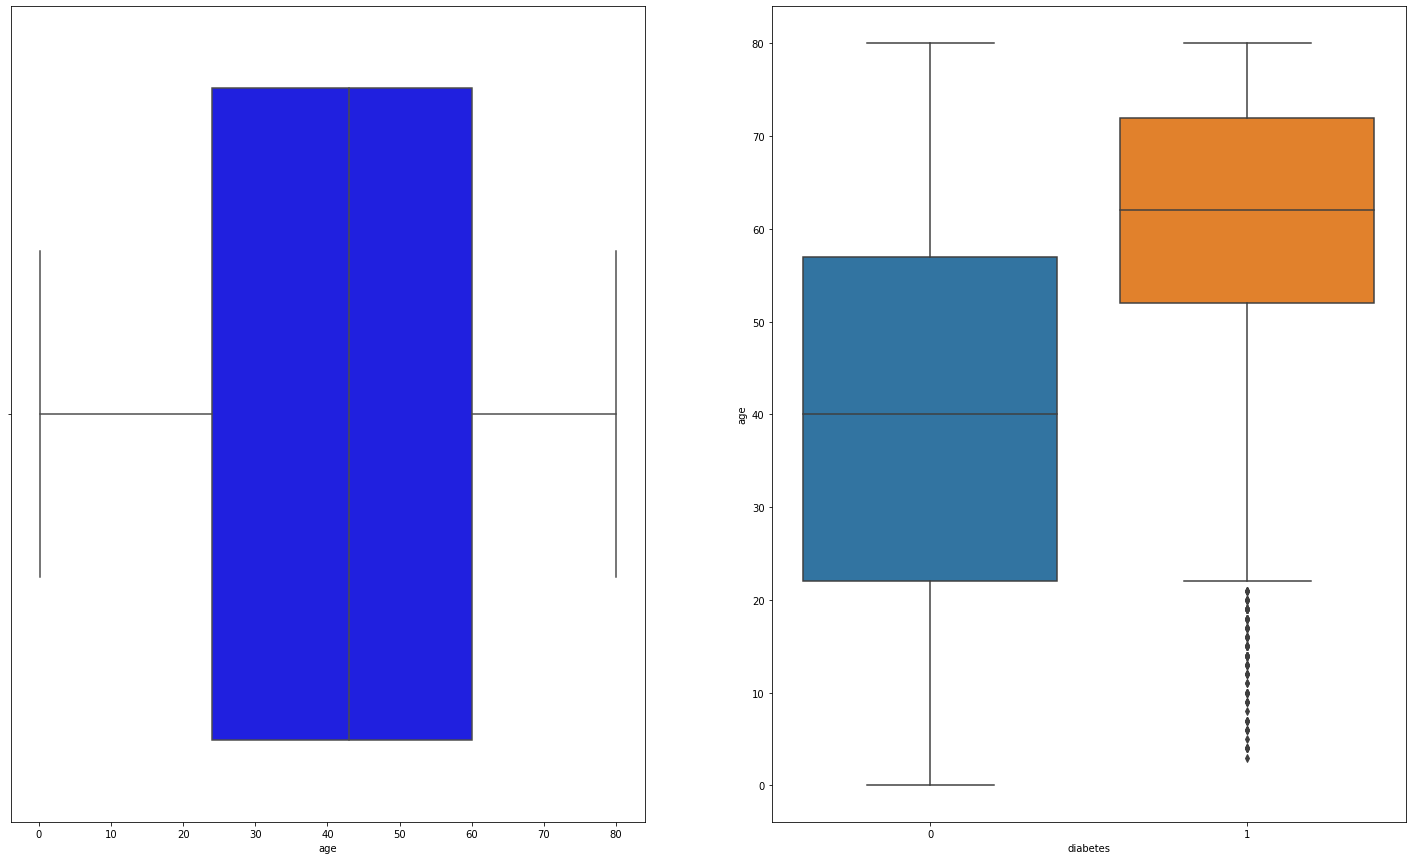

<Figure size 432x288 with 0 Axes>

In [3]:
fig, ax = plt.subplots(1,2,figsize=(25,15))
plt.figure(1)
sns.boxplot(x=df['age'],ax=ax[0],color='blue')
plt.figure(2)
sns.boxplot(data=df,ax=ax[1],x="diabetes", y="age") 


 - On peut remarquer qu'il n'existe pas des valeurs aberrantes pour l'attribut age elle meme. Cependant, si la personne est diabetiques ("diabetes : 1"), les valeurs aberrantes apparaissent.

<AxesSubplot:xlabel='diabetes', ylabel='bmi'>

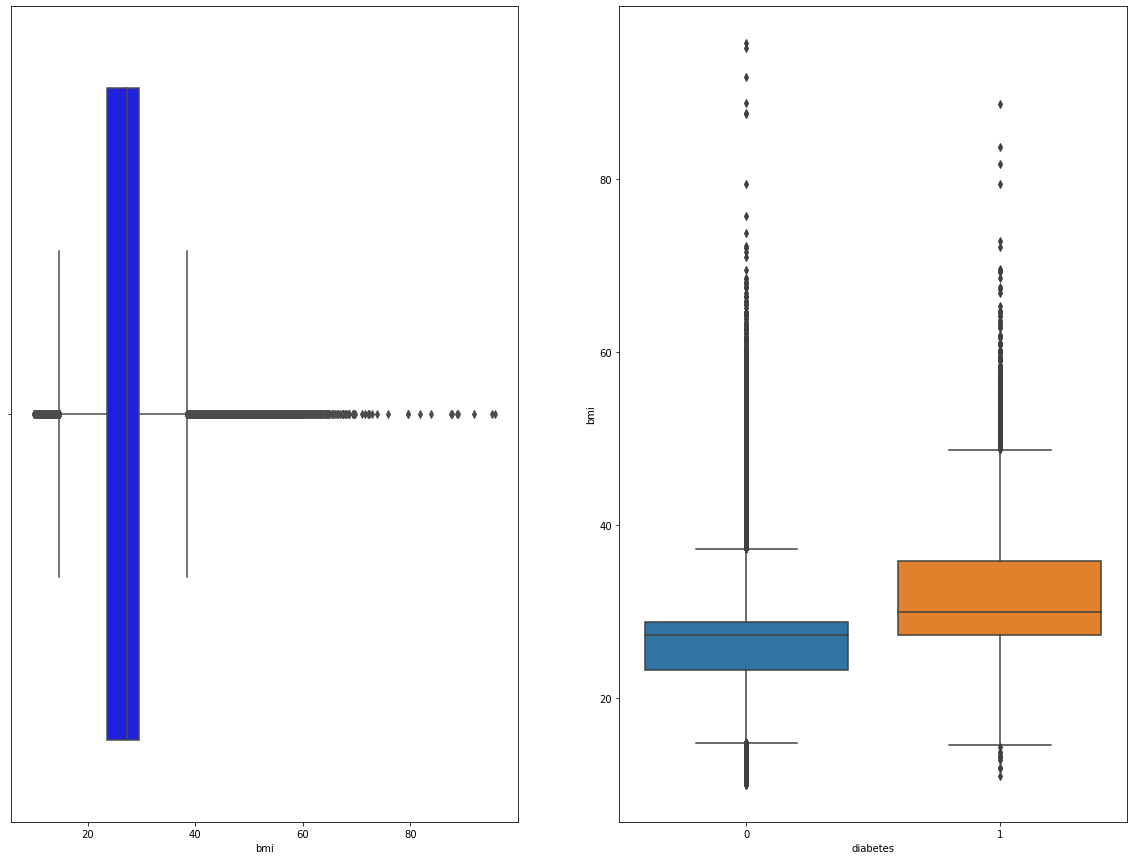

<Figure size 432x288 with 0 Axes>

In [4]:
fig, ax = plt.subplots(1,2,figsize=(20,15))
plt.figure(1)
sns.boxplot(x=df['bmi'],ax=ax[0],color='blue')
plt.figure(2)
sns.boxplot(data=df,ax=ax[1], x="diabetes", y="bmi") 

 - On remarque qu'il existe beaucoup de valeurs aberrantes pour l'attribut bmi. Meme chose si la personne est diabetique ou non-diabetique.

<AxesSubplot:xlabel='diabetes', ylabel='HbA1c_level'>

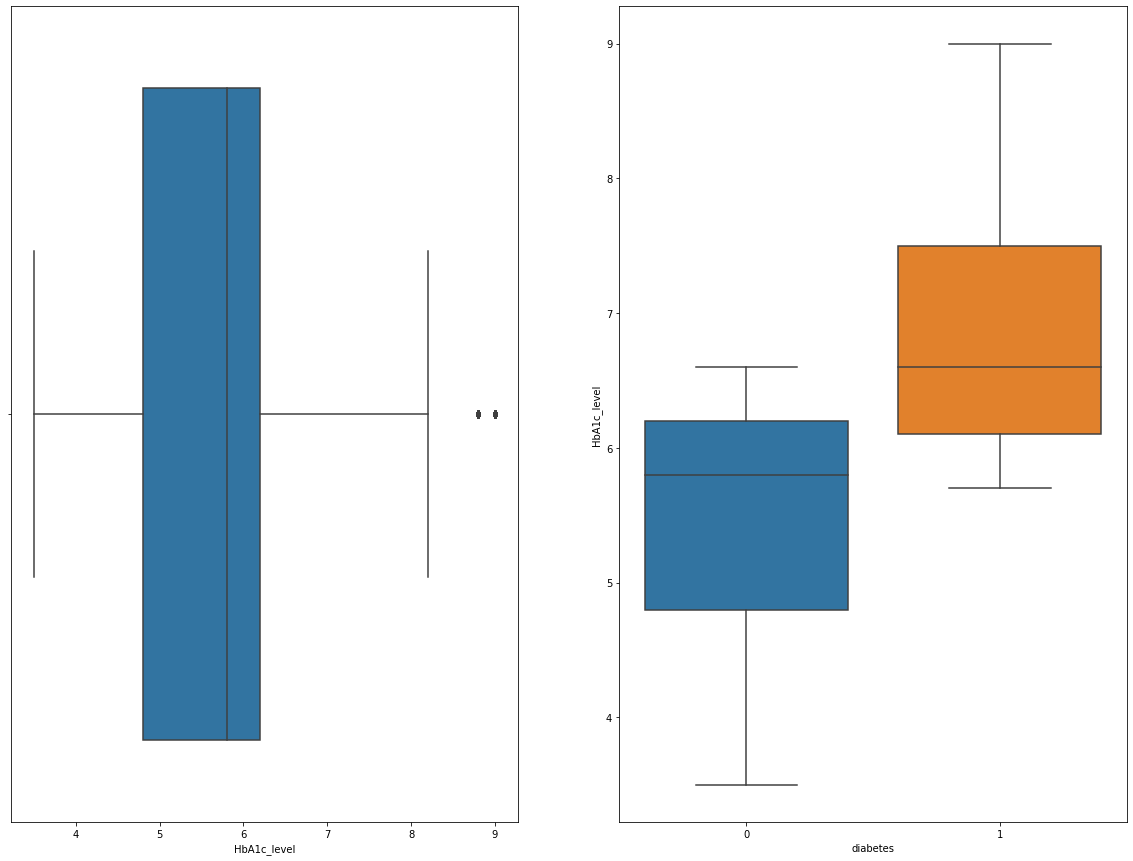

<Figure size 432x288 with 0 Axes>

In [5]:
fig, ax = plt.subplots(1,2,figsize=(20,15))
plt.figure(1)
sns.boxplot(x=df['HbA1c_level'],ax=ax[0])
plt.figure(2)
sns.boxplot(data=df,ax=ax[1], x="diabetes", y="HbA1c_level") 

- On remarque pour l'attribut HbA1c_level qu'il existe deux valeurs aberrantes qui disparaissent dans la deuxieme figures. 

<AxesSubplot:xlabel='diabetes', ylabel='blood_glucose_level'>

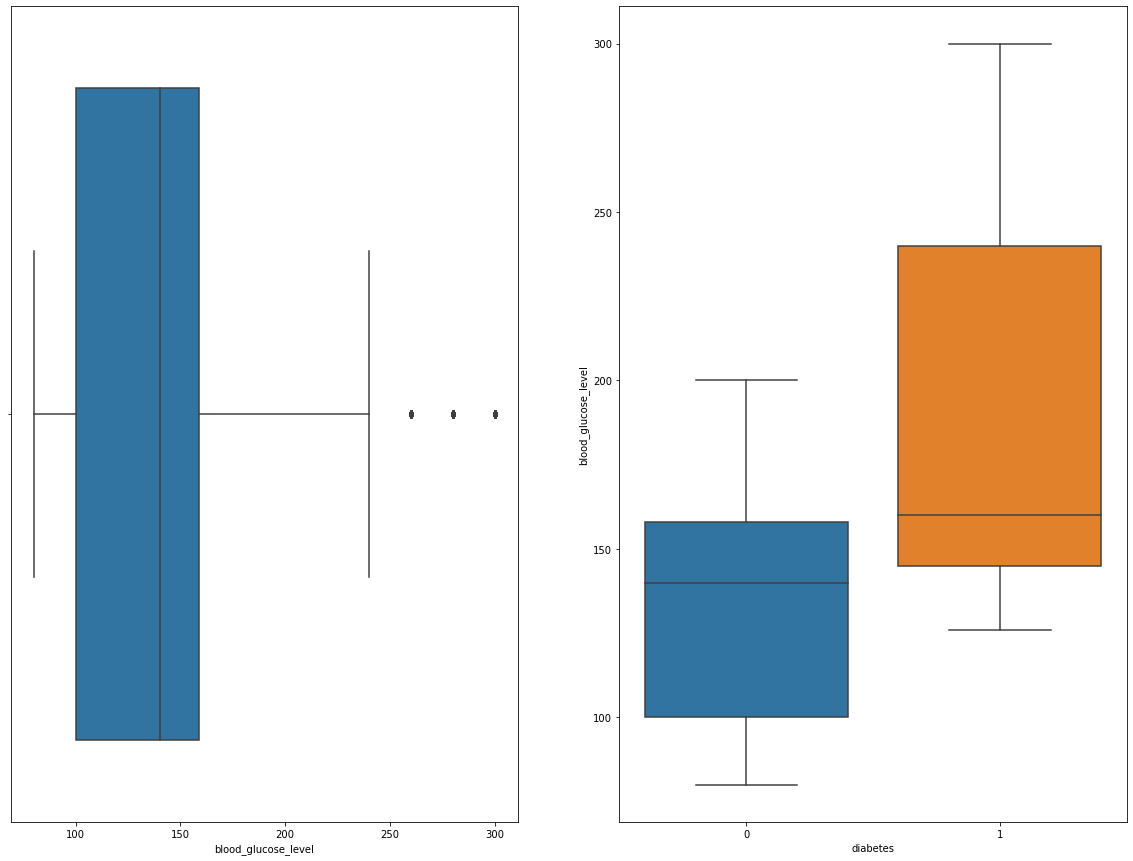

<Figure size 432x288 with 0 Axes>

In [6]:
fig, ax = plt.subplots(1,2,figsize=(20,15))
plt.figure(1)
sns.boxplot(x=df['blood_glucose_level'],ax=ax[0])
plt.figure(2)
sns.boxplot(data=df,ax=ax[1], x="diabetes", y="blood_glucose_level")

- Meme chose pour l'attribut blood_glucose_level. Pour l'attribut lui meme, il existe trois valeurs abrrantes mais ils disparaissent dans la deuxieme figure.

Text(0.5, 1.0, 'Gender Distribution')

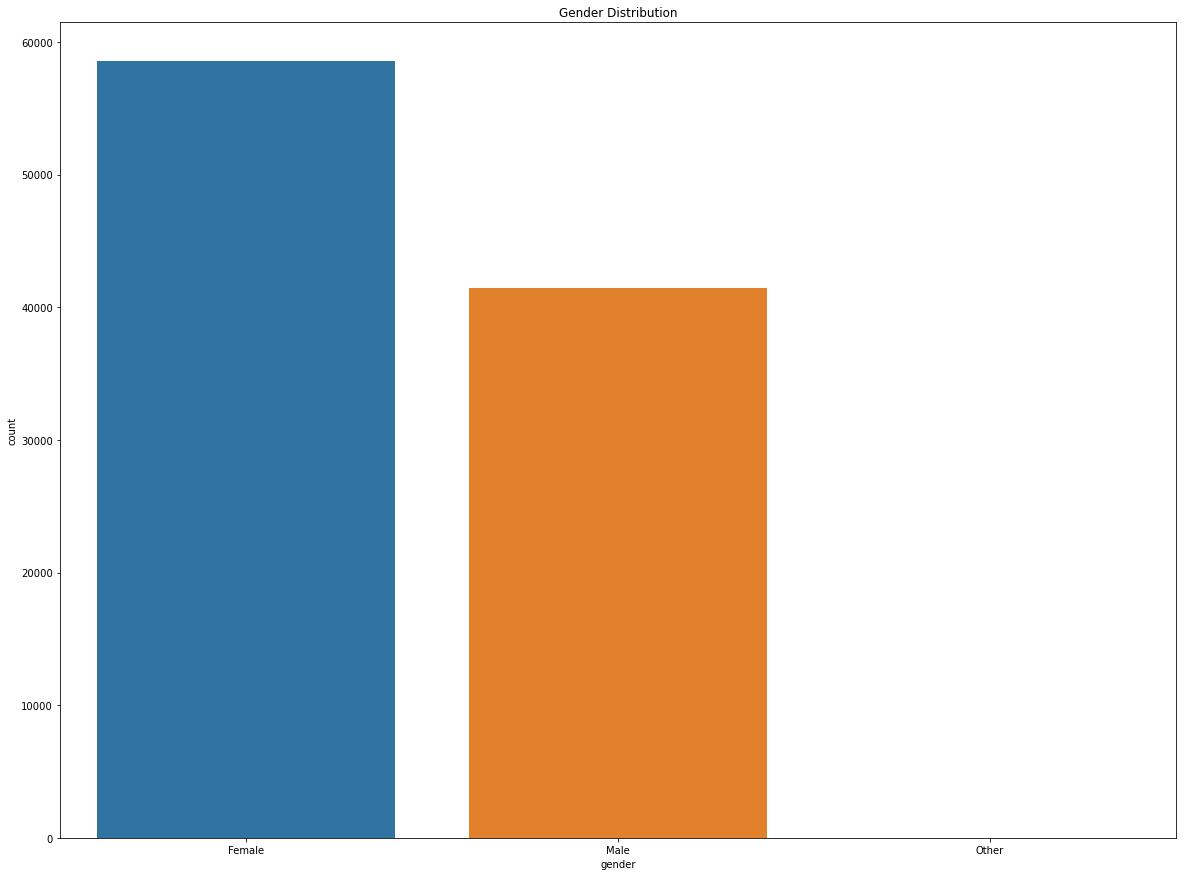

In [7]:
fig, ax = plt.subplots(figsize=(20,15))
sns.countplot(x='gender', data=df).set_title('Gender Distribution')

- On remarque que la categorie "Other" est beaucoup moins presente que les autres categories "Male", "Female" qui sont bien distribuees entre eux.

Text(0.5, 1.0, 'Smoking History Distribution')

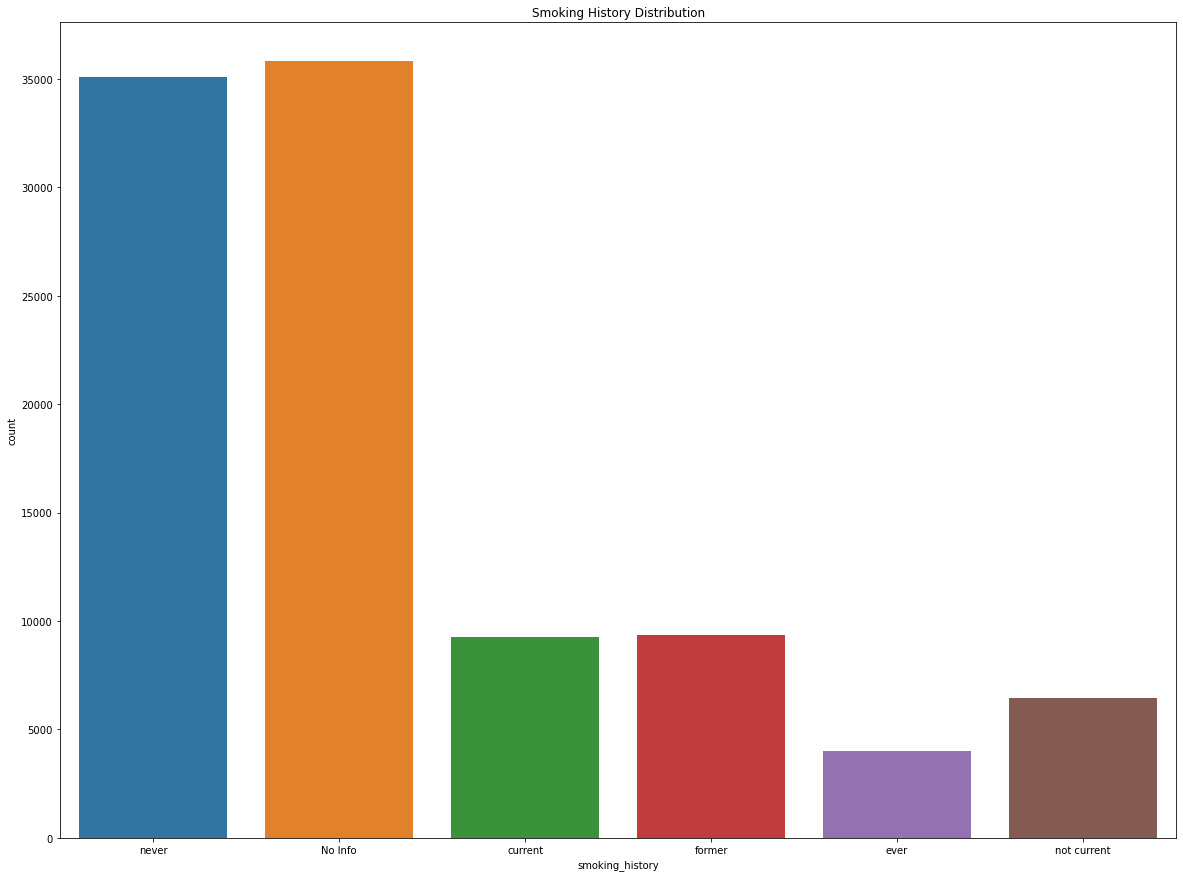

In [8]:
fig, ax = plt.subplots(figsize=(20,15))
sns.countplot(x='smoking_history', data=df).set_title('Smoking History Distribution')


- On remarque que les categories "never", "No Info" domine par rapport aux autres categories. Alors la distribution n'est pas bien reparti.

3. **Distribution de la variable cible** :

    - Analysez la distribution de la variable cible pour identifier les déséquilibres de classes. Utilisez des diagrammes en barres pour visualiser les fréquences des classes.

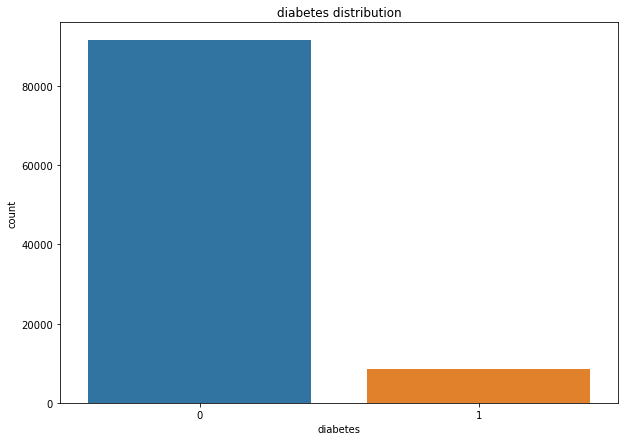

In [9]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='diabetes', data=df)
plt.title('diabetes distribution')
plt.show()

4. **Fractionnement des données** :

    - Divisez le jeu de données en ensembles d'entraînement (80 %) et de test (20 %) en utilisant la méthode du holdout.

    - Assurez-vous que ce fractionnement intervient avant tout prétraitement afin d'éviter les fuites de données.

In [10]:
X = df.drop(["diabetes"],axis=1)
y = df["diabetes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Prétraitement des données

In [11]:
categorical_attributes = ['gender', 'smoking_history']
numerical_attributes = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

5. **Encodage des variables catégoriques** :

    - Encodez les variables catégoriques. Justifiez la méthode choisie.

- Tout d'abord, voyons quelles sont les catégories que nous avons dans les colonnes « gender » et « smoking_history ».

In [12]:
gender_values = pd.unique(X_train["gender"])
gender_values

array(['Female', 'Male', 'Other'], dtype=object)

In [13]:
smoking_history_values = pd.unique(X_train["smoking_history"])
smoking_history_values

array(['former', 'never', 'No Info', 'current', 'not current', 'ever'],
      dtype=object)

- Nous remarquons que les catégories de « gender » (Male, Female, Other) et de « smoking_history » (former, never, No Info, current, not current, ever) ne sont pas ordonnées ou liées. C'est pourquoi nous utiliserons la méthode oneHotEncoder pour encoder les valeurs categriales de ces deux attributs.

In [14]:
encoder = OneHotEncoder(handle_unknown='ignore')

6. **Normalisation/Standardisation des attributs numériques** :

    - Normalisez ou standardisez les attributs numériques si nécessaire. Décrivez la technique utilisée (par exemple, le scaling Min-Max, StandardScaler) et expliquez pourquoi elle est appropriée pour ce jeu de données.

    - Assurez-vous que cette technique est appliquée uniquement aux données d'entraînement, avec la même transformation appliquée ensuite aux données de test sans nouvel ajustement.

On utilisera la technique StandardScaler() comme :
-  On a beaucoup de valeurs aberrantes,
- C'est plus robuste face aux valeurs aberrantes que la technique MinMaxScaler()... 
- Les modeles de KNN et de la regression logistque sont sensibles aux variations d'echelle entre les attributs.

In [15]:
scaler = StandardScaler() 
preprocessor = ColumnTransformer(transformers=[('num', scaler, numerical_attributes), ('cat', encoder, categorical_attributes)])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

## Développement et évaluation des modèles

7. **Développement des modèles** :

    - Implémentez les modèles d'apprentissage automatique abordés en classe : arbres de décision, K-Nearest Neighbors (KNN) et régression logistique. Utilisez les paramètres par défaut de scikit-learn comme base pour entraîner chaque modèle.

7.1. **Modèle d'arbre de décision**

In [16]:
dt_model = DecisionTreeClassifier()

7.2.**Modèle des K-voisins les plus proches (KNN)**

In [17]:
knn_model = KNeighborsClassifier()

7.3. **Modèle de régression logistique**

In [18]:
lr_model = LogisticRegression()

8. **Évaluation des modèles** :

    - Utilisez la validation croisée pour évaluer chaque modèle, en justifiant votre choix du nombre de plis.

    - Évaluez les modèles à l'aide de métriques telles que la précision, le rappel et le score F1.

Justification du choix du nombre de plis : 
- Si on prend cv = 3, la variance augmente et si on prend cv = 10, le cout de calcul augmente. C'est pourquoi, en prenant cv = 5, on realise un equilibre entre la variance et le cout de calcul qui va nous aider a a voir des bonnes resultats avec un peu de memoire et de temps.

8.1. **Evaluation du modèle d'arbre de décision**

In [19]:
dt_accuracy_scores = cross_val_score(dt_model, X_train_preprocessed, y_train, cv=5, scoring='accuracy')
dt_recall_scores = cross_val_score(dt_model, X_train_preprocessed, y_train, cv=5, scoring='recall')
dt_f1_scores = cross_val_score(dt_model, X_train_preprocessed, y_train, cv=5, scoring='f1')
print("accuracy scores : ", dt_accuracy_scores)
print("recall scores : ", dt_recall_scores)
print("f1 scores : ", dt_f1_scores)

accuracy scores :  [0.953125  0.952375  0.95225   0.9468125 0.948    ]
recall scores :  [0.75       0.72647059 0.74044118 0.71838235 0.71838235]
f1 scores :  [0.72870437 0.71798614 0.72210223 0.70035587 0.70221904]


8.2.**Evaluation du modèle des K-voisins les plus proches (KNN)**

In [20]:
knn_accuracy_scores = cross_val_score(knn_model, X_train_preprocessed, y_train, cv=5, scoring='accuracy')
knn_recall_scores = cross_val_score(knn_model, X_train_preprocessed, y_train, cv=5, scoring='recall')
knn_f1_scores = cross_val_score(knn_model, X_train_preprocessed, y_train, cv=5, scoring='f1')
print("accuracy scores : ", knn_accuracy_scores)
print("recall scores : ", knn_recall_scores)
print("f1 scores : ", knn_f1_scores)

accuracy scores :  [0.9630625 0.962625  0.9629375 0.9614375 0.9601875]
recall scores :  [0.63088235 0.63088235 0.62132353 0.61029412 0.61323529]
f1 scores :  [0.74382315 0.74157303 0.74025405 0.72902942 0.72364425]


8.3. **Evaluation du modèle de la régression logistique**

In [21]:
lr_accuracy_scores = cross_val_score(lr_model, X_train_preprocessed, y_train, cv=5, scoring='accuracy')
lr_recall_scores = cross_val_score(lr_model, X_train_preprocessed, y_train, cv=5, scoring='recall')
lr_f1_scores = cross_val_score(lr_model, X_train_preprocessed, y_train, cv=5, scoring='f1')
print("accuracy scores : ", lr_accuracy_scores)
print("recall scores : ", lr_recall_scores)
print("f1 scores : ", lr_f1_scores)

accuracy scores :  [0.96     0.961625 0.960375 0.958625 0.959875]
recall scores :  [0.62867647 0.62647059 0.61029412 0.60514706 0.62279412]
f1 scores :  [0.72765957 0.73511648 0.72362685 0.71317158 0.72517123]


## Optimisation des hyperparamètres

9. **Exploration et évaluation des performances :**

- Étudiez l'impact de la variation des valeurs des hyperparamètres sur les performances de chaque modèle.

    - Concentrez-vous sur les hyperparamètres pertinents suivants pour chaque modèle :

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html) : `criterion` et `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html) : `penalty`, `max_iter`, et `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) : `n_neighbors` et `weights`.

- ***DecisionTreeClassifier hyperparamaters***

In [22]:
dt_param_grid = [{
    'criterion': ['gini', 'entropy','log_loss'], 
    'max_depth': [None, 10, 20, 30]
    }]
dt_scores =['']*3

- ***LogisticRegression hyperparamaters***

In [23]:
lr_param_grid = [
  {'penalty': ["l1", "l2"],
   'solver' : ['saga'],
   'max_iter' : [500, 800, 1600],
   'tol' : [0.01, 0.001, 0.0001]}
]
lr_scores = ['']*3

- ***KNeighborsClassifier hyperparamaters***

In [24]:
knn_param_grid = [{
    'n_neighbors': range(1,10), 
    'weights': ['uniform', 'distance']
    }]
knn_scores = ['']*3

- Employez une stratégie de recherche en grille ou utilisez les méthodes intégrées de scikit-learn pour évaluer exhaustivement toutes les combinaisons des valeurs d'hyperparamètres. La validation croisée doit être utilisée pour évaluer chaque combinaison.

On va utiliser la methode GridSearchCV du scikit-learn qui utilise la validation croisée pour comparer la precision, le rappel et le score f1

- ***DecisionTreeClassifier GridSearchCV***

In [25]:
dt_accuracy_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='accuracy') #precicion
dt_recall_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='recall') #rappel
dt_f1_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='f1') # score F1

- ***LogisticRegression GridSearchCV***


In [26]:
lr_accuracy_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='accuracy')#precicion
lr_recall_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='recall')#rappel
lr_f1_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='f1')# score F1

- ***KNeighborsClassifier GridSearchCV***


In [27]:
knn_accuracy_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='accuracy')#precicion
knn_recall_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='recall')#rappel
knn_f1_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='f1')# score F1

- Quantifiez les performances de chaque configuration d'hyperparamètres en utilisant des métriques telles que la précision, le rappel et le score F1.

- ***DecisionTreeClassifier***

 - **a) Accuracy** 

In [28]:
dt_accuracy_grid_search.fit(X_train_preprocessed, y_train)
dt_cv_accuracy_results = pd.DataFrame(dt_accuracy_grid_search.cv_results_)
dt_cv_accuracy_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.107442,0.007750,0.002345,0.000142,gini,None,"{'criterion': 'gini', 'max_depth': None}",0.952937,0.952000,0.952187,0.945750,0.949063,0.950387,0.002669,11
1,0.076923,0.000403,0.001852,0.000037,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.972688,0.971437,0.972250,0.970063,0.970000,0.971288,0.001102,3
2,0.100594,0.001031,0.002300,0.000117,gini,20,"{'criterion': 'gini', 'max_depth': 20}",0.957937,0.955688,0.957625,0.952250,0.955375,0.955775,0.002034,6
3,0.102242,0.000838,0.002285,0.000093,gini,30,"{'criterion': 'gini', 'max_depth': 30}",0.952875,0.952375,0.952063,0.946875,0.947063,0.950250,0.002692,12
4,0.103256,0.001299,0.002467,0.000101,entropy,None,"{'criterion': 'entropy', 'max_depth': None}",0.953375,0.952438,0.950875,0.948562,0.950438,0.951138,0.001666,10
5,0.071747,0.000794,0.002029,0.000117,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.972750,0.971187,0.972187,0.970500,0.970500,0.971425,0.000906,1
6,0.095463,0.002226,0.002340,0.000066,entropy,20,"{'criterion': 'entropy', 'max_depth': 20}",0.960812,0.959875,0.960187,0.956375,0.958187,0.959088,0.001611,4
7,0.099250,0.001110,0.002229,0.000082,entropy,30,"{'criterion': 'entropy', 'max_depth': 30}",0.953125,0.952625,0.952500,0.948750,0.951000,0.951600,0.001592,7
8,0.099417,0.001641,0.002304,0.000132,log_loss,None,"{'criterion': 'log_loss', 'max_depth': None}",0.953313,0.952125,0.951250,0.948562,0.951250,0.951300,0.001564,9
9,0.070314,0.000647,0.001937,0.000103,log_loss,10,"{'criterion': 'log_loss', 'max_depth': 10}",0.972750,0.971187,0.972187,0.970500,0.970500,0.971425,0.000906,1


In [29]:
dt_scores[0] = dt_accuracy_grid_search.best_score_
print("best performance in terms of accuracy of the DecisionTreeClassifier model is : ",dt_accuracy_grid_search.best_score_," , was given by using the paramaters : ",dt_accuracy_grid_search.best_params_)

best performance in terms of accuracy of the DecisionTreeClassifier model is :  0.971425  , was given by using the paramaters :  {'criterion': 'entropy', 'max_depth': 10}


 - **b) Recall** 

In [30]:
dt_recall_grid_search.fit(X_train_preprocessed, y_train)
dt_cv_recall_results = pd.DataFrame(dt_recall_grid_search.cv_results_)
dt_cv_recall_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.109979,0.010745,0.004788,0.000077,gini,None,"{'criterion': 'gini', 'max_depth': None}",0.747059,0.722794,0.741176,0.716912,0.722059,0.730000,0.011851,4
1,0.080581,0.001655,0.004724,0.000242,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.691912,0.675735,0.683824,0.658088,0.667647,0.675441,0.011862,10
2,0.103835,0.000951,0.004866,0.000200,gini,20,"{'criterion': 'gini', 'max_depth': 20}",0.733088,0.716176,0.721324,0.706618,0.706618,0.716765,0.009935,7
3,0.107062,0.000916,0.005262,0.000493,gini,30,"{'criterion': 'gini', 'max_depth': 30}",0.747794,0.727941,0.738971,0.716912,0.723529,0.731029,0.011038,1
4,0.101247,0.000947,0.005023,0.000251,entropy,None,"{'criterion': 'entropy', 'max_depth': None}",0.752941,0.734559,0.733088,0.717647,0.715441,0.730735,0.013553,2
5,0.069873,0.000878,0.004280,0.000173,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.686029,0.675000,0.687500,0.662500,0.658088,0.673824,0.011943,11
6,0.093792,0.001260,0.004423,0.000071,entropy,20,"{'criterion': 'entropy', 'max_depth': 20}",0.727206,0.712500,0.715441,0.699265,0.696324,0.710147,0.011261,9
7,0.098117,0.001066,0.004510,0.000092,entropy,30,"{'criterion': 'entropy', 'max_depth': 30}",0.748529,0.729412,0.730882,0.709559,0.711765,0.726029,0.014255,6
8,0.097620,0.001152,0.004548,0.000067,log_loss,None,"{'criterion': 'log_loss', 'max_depth': None}",0.754412,0.730882,0.737500,0.714706,0.713971,0.730294,0.015122,3
9,0.068777,0.000919,0.004270,0.000412,log_loss,10,"{'criterion': 'log_loss', 'max_depth': 10}",0.686029,0.675000,0.687500,0.662500,0.658088,0.673824,0.011943,11


In [31]:
dt_scores[1] = dt_recall_grid_search.best_score_
print("best performance in terms of recall of the DecisionTreeClassifier model is : ",dt_recall_grid_search.best_score_," , was given by using the paramaters : ",dt_recall_grid_search.best_params_)

best performance in terms of recall of the DecisionTreeClassifier model is :  0.7310294117647059  , was given by using the paramaters :  {'criterion': 'gini', 'max_depth': 30}


 - **c) F1 score** 

In [32]:
dt_f1_grid_search.fit(X_train_preprocessed, y_train)
dt_cv_f1_results = pd.DataFrame(dt_f1_grid_search.cv_results_)
dt_cv_f1_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.106501,0.008428,0.004689,0.000179,gini,None,"{'criterion': 'gini', 'max_depth': None}",0.731268,0.717502,0.724324,0.691297,0.700107,0.712900,0.014963,12
1,0.077162,0.000581,0.004313,0.000221,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.811907,0.800871,0.807292,0.788894,0.790596,0.799912,0.009027,3
2,0.100831,0.001160,0.004564,0.000182,gini,20,"{'criterion': 'gini', 'max_depth': 20}",0.745611,0.735650,0.743029,0.715138,0.730711,0.734028,0.010823,6
3,0.103568,0.002057,0.004648,0.000103,gini,30,"{'criterion': 'gini', 'max_depth': 30}",0.726429,0.720410,0.721821,0.699715,0.698503,0.713376,0.011824,11
4,0.099000,0.001039,0.004595,0.000177,entropy,None,"{'criterion': 'entropy', 'max_depth': None}",0.730466,0.723512,0.721983,0.702683,0.712560,0.718241,0.009650,8
5,0.068796,0.000943,0.004361,0.000227,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.810599,0.799303,0.807775,0.792436,0.791335,0.800290,0.007812,1
6,0.093015,0.001339,0.004388,0.000111,entropy,20,"{'criterion': 'entropy', 'max_depth': 20}",0.759387,0.755142,0.754468,0.730146,0.737209,0.747270,0.011446,5
7,0.097595,0.001680,0.004475,0.000107,entropy,30,"{'criterion': 'entropy', 'max_depth': 30}",0.733357,0.721192,0.717672,0.701374,0.717495,0.718218,0.010223,9
8,0.098971,0.002369,0.004694,0.000261,log_loss,None,"{'criterion': 'log_loss', 'max_depth': None}",0.734987,0.722944,0.719798,0.696751,0.708944,0.716685,0.012970,10
9,0.069571,0.000815,0.004346,0.000086,log_loss,10,"{'criterion': 'log_loss', 'max_depth': 10}",0.810599,0.799303,0.807775,0.792436,0.791335,0.800290,0.007812,1


In [33]:
dt_scores[2] = dt_f1_grid_search.best_score_
print("best performance in terms of f1 score of the DecisionTreeClassifier model is : ",dt_f1_grid_search.best_score_," , was given by using the paramaters : ",dt_f1_grid_search.best_params_)

best performance in terms of f1 score of the DecisionTreeClassifier model is :  0.8002899266680936  , was given by using the paramaters :  {'criterion': 'entropy', 'max_depth': 10}


- ***KNeighborsClassifier***

 - **a) Accuracy** 

In [34]:
knn_accuracy_grid_search.fit(X_train_preprocessed, y_train)
knn_cv_accuracy_results = pd.DataFrame(knn_accuracy_grid_search.cv_results_)
knn_cv_accuracy_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.062417,0.000887,0.523322,0.011986,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.949625,0.950438,0.950500,0.948688,0.947875,0.949425,0.001017,17
1,0.061877,0.000444,0.290251,0.009508,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.949625,0.950438,0.950500,0.948688,0.947875,0.949425,0.001017,17
2,0.062103,0.000404,0.608533,0.008209,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.963125,0.963562,0.962313,0.961750,0.960938,0.962337,0.000941,6
3,0.061624,0.000397,0.367996,0.006671,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.950250,0.951063,0.950812,0.949125,0.948750,0.950000,0.000914,16
4,0.061216,0.000308,0.645556,0.004544,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.960625,0.961125,0.959375,0.958500,0.958125,0.959550,0.001166,13
5,0.060895,0.000176,0.416918,0.007949,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.958063,0.959125,0.957500,0.956438,0.955187,0.957263,0.001353,15
6,0.061048,0.000084,0.700710,0.006886,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.963812,0.963000,0.962625,0.962000,0.961187,0.962525,0.000890,5
7,0.061084,0.000196,0.470846,0.004076,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.959875,0.960187,0.959688,0.957438,0.956375,0.958713,0.001521,14
8,0.061617,0.000718,0.752979,0.006887,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.963063,0.962625,0.962938,0.961437,0.960187,0.962050,0.001094,7
9,0.061164,0.000169,0.521099,0.010339,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.961063,0.960625,0.960562,0.959313,0.958125,0.959937,0.001077,12


In [35]:
knn_scores[0] = knn_accuracy_grid_search.best_score_
print("best performance in terms of accuracy of the KNeighborsClassifier model is : ",knn_accuracy_grid_search.best_score_," , was given by using the paramaters : ",knn_accuracy_grid_search.best_params_)

best performance in terms of accuracy of the KNeighborsClassifier model is :  0.9631124999999999  , was given by using the paramaters :  {'n_neighbors': 7, 'weights': 'uniform'}


 - **b) Recall** 


In [36]:
knn_recall_grid_search.fit(X_train_preprocessed, y_train)
knn_cv_recall_results = pd.DataFrame(knn_recall_grid_search.cv_results_)
knn_cv_recall_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.062845,0.001764,0.525720,0.021117,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.685294,0.689706,0.685294,0.666176,0.658088,0.676912,0.012440,1
1,0.061459,0.000237,0.285344,0.005198,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.685294,0.689706,0.685294,0.666176,0.658088,0.676912,0.012440,1
2,0.061978,0.000625,0.600929,0.005054,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.619118,0.620588,0.600000,0.591912,0.589706,0.604265,0.013189,14
3,0.062563,0.001307,0.377965,0.006310,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.683824,0.686765,0.684559,0.664706,0.657353,0.675441,0.012034,3
4,0.061570,0.000765,0.649767,0.006279,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.653676,0.654412,0.641176,0.625000,0.630147,0.640882,0.011953,6
5,0.061474,0.000548,0.423503,0.009210,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.661029,0.661765,0.650000,0.633088,0.632353,0.647647,0.012883,5
6,0.061360,0.000454,0.703210,0.007890,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.611765,0.601471,0.593382,0.585294,0.581618,0.594706,0.010940,16
7,0.061273,0.000164,0.478602,0.010049,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.662500,0.659559,0.656618,0.628676,0.638235,0.649118,0.013271,4
8,0.061107,0.000123,0.760873,0.012462,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.630882,0.630882,0.621324,0.610294,0.613235,0.621324,0.008600,10
9,0.061502,0.001154,0.524153,0.004240,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.646324,0.638971,0.633088,0.614706,0.616912,0.630000,0.012342,7


In [37]:
knn_scores[1] = knn_recall_grid_search.best_score_
print("best performance in terms of recall of the DecisionTreeClassifier model is : ",knn_recall_grid_search.best_score_," , was given by using the paramaters : ",knn_recall_grid_search.best_params_)

best performance in terms of recall of the DecisionTreeClassifier model is :  0.6769117647058824  , was given by using the paramaters :  {'n_neighbors': 1, 'weights': 'uniform'}


 - **c) F1 score** 


In [38]:
knn_f1_grid_search.fit(X_train_preprocessed, y_train)
knn_cv_f1_results = pd.DataFrame(knn_f1_grid_search.cv_results_)
knn_cv_f1_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.066987,0.010013,0.517688,0.003370,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.698127,0.702885,0.701807,0.688188,0.682165,0.694635,0.008109,17
1,0.062209,0.001025,0.290483,0.003279,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.698127,0.702885,0.701807,0.688188,0.682165,0.694635,0.008109,17
2,0.063937,0.001817,0.631342,0.019684,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.740545,0.743285,0.730201,0.724572,0.719605,0.731642,0.009075,6
3,0.062185,0.000347,0.376442,0.004960,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.700301,0.704640,0.702907,0.689550,0.685583,0.696596,0.007605,16
4,0.062355,0.000185,0.675739,0.013255,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.738372,0.741049,0.728488,0.719120,0.718960,0.729198,0.009290,10
5,0.062519,0.000775,0.442392,0.005796,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.728230,0.733496,0.722222,0.711864,0.705786,0.720320,0.010223,15
6,0.062250,0.000442,0.727250,0.019365,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.741864,0.734291,0.729656,0.723636,0.718112,0.729512,0.008245,9
7,0.062125,0.001087,0.506254,0.008788,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.737316,0.737968,0.734677,0.715182,0.713229,0.727674,0.011070,13
8,0.062078,0.000799,0.778690,0.010166,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.743823,0.741573,0.740254,0.729029,0.723644,0.735665,0.007887,2
9,0.062185,0.000736,0.551793,0.020983,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.738345,0.733953,0.731832,0.719759,0.714651,0.727708,0.008976,12


In [39]:
knn_scores[2] = knn_f1_grid_search.best_score_
print("best performance in terms of f1 score of the DecisionTreeClassifier model is : ",knn_f1_grid_search.best_score_," , was given by using the paramaters : ",knn_f1_grid_search.best_params_)

best performance in terms of f1 score of the DecisionTreeClassifier model is :  0.7373110181952398  , was given by using the paramaters :  {'n_neighbors': 7, 'weights': 'uniform'}


- ***LogisticRegression***

 - **a) Accuracy** 

In [40]:
lr_accuracy_grid_search.fit(X_train_preprocessed, y_train)
lr_cv_accuracy_results = pd.DataFrame(lr_accuracy_grid_search.cv_results_)
lr_cv_accuracy_results

/Users/jeribiadam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jeribiadam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_penalty,param_solver,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.082884,0.005073,0.001391,0.000060,500,l1,saga,0.0100,"{'max_iter': 500, 'penalty': 'l1', 'solver': '...",0.960000,0.961500,0.960313,0.958812,0.959875,0.960100,0.000863,16
1,1.067614,0.092940,0.001827,0.000496,500,l1,saga,0.0010,"{'max_iter': 500, 'penalty': 'l1', 'solver': '...",0.960125,0.961562,0.960375,0.958750,0.959937,0.960150,0.000900,7
2,3.168830,0.909382,0.001579,0.000126,500,l1,saga,0.0001,"{'max_iter': 500, 'penalty': 'l1', 'solver': '...",0.960125,0.961562,0.960375,0.958750,0.959937,0.960150,0.000900,7
3,0.062142,0.010396,0.001464,0.000139,500,l2,saga,0.0100,"{'max_iter': 500, 'penalty': 'l2', 'solver': '...",0.960063,0.961500,0.960313,0.958688,0.959937,0.960100,0.000898,17
4,1.757806,0.063385,0.001639,0.000193,500,l2,saga,0.0010,"{'max_iter': 500, 'penalty': 'l2', 'solver': '...",0.960187,0.961562,0.960313,0.958812,0.959937,0.960163,0.000878,1
5,3.768506,0.113844,0.001531,0.000081,500,l2,saga,0.0001,"{'max_iter': 500, 'penalty': 'l2', 'solver': '...",0.960187,0.961562,0.960313,0.958812,0.959937,0.960163,0.000878,1
6,0.083200,0.017266,0.001416,0.000088,800,l1,saga,0.0100,"{'max_iter': 800, 'penalty': 'l1', 'solver': '...",0.960187,0.961562,0.960375,0.958750,0.959812,0.960137,0.000908,14
7,1.062895,0.086182,0.001764,0.000498,800,l1,saga,0.0010,"{'max_iter': 800, 'penalty': 'l1', 'solver': '...",0.960125,0.961562,0.960375,0.958750,0.959937,0.960150,0.000900,7
8,3.833438,2.183913,0.001605,0.000134,800,l1,saga,0.0001,"{'max_iter': 800, 'penalty': 'l1', 'solver': '...",0.960125,0.961562,0.960375,0.958750,0.959937,0.960150,0.000900,7
9,0.067737,0.007350,0.001411,0.000061,800,l2,saga,0.0100,"{'max_iter': 800, 'penalty': 'l2', 'solver': '...",0.960063,0.961562,0.960375,0.958750,0.959937,0.960137,0.000901,14


In [41]:
lr_scores[0] = lr_accuracy_grid_search.best_score_
print("best performance in terms of accuracy of the LogisticRegression model is : ",lr_accuracy_grid_search.best_score_," , was given by using the paramaters : ",lr_accuracy_grid_search.best_params_)

best performance in terms of accuracy of the LogisticRegression model is :  0.9601625  , was given by using the paramaters :  {'max_iter': 500, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.001}


 - **b) Recall** 


In [42]:
lr_recall_grid_search.fit(X_train_preprocessed, y_train)
lr_cv_recall_results = pd.DataFrame(lr_recall_grid_search.cv_results_)
lr_cv_recall_results

/Users/jeribiadam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jeribiadam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_penalty,param_solver,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.077453,0.006057,0.003998,0.000182,500,l1,saga,0.0100,"{'max_iter': 500, 'penalty': 'l1', 'solver': '...",0.630882,0.625000,0.610294,0.606618,0.622059,0.618971,0.009118,3
1,1.097734,0.077230,0.004532,0.000687,500,l1,saga,0.0010,"{'max_iter': 500, 'penalty': 'l1', 'solver': '...",0.630882,0.625000,0.611029,0.605882,0.622059,0.618971,0.009189,3
2,3.431938,1.080682,0.006164,0.004145,500,l1,saga,0.0001,"{'max_iter': 500, 'penalty': 'l1', 'solver': '...",0.630882,0.625000,0.611029,0.605882,0.622059,0.618971,0.009189,3
3,0.068833,0.007227,0.003792,0.000083,500,l2,saga,0.0100,"{'max_iter': 500, 'penalty': 'l2', 'solver': '...",0.625735,0.625000,0.611765,0.605882,0.621324,0.617941,0.007818,17
4,1.682812,0.026142,0.004205,0.000209,500,l2,saga,0.0010,"{'max_iter': 500, 'penalty': 'l2', 'solver': '...",0.630882,0.625000,0.610294,0.606618,0.622059,0.618971,0.009118,3
5,3.551429,0.067854,0.004409,0.000385,500,l2,saga,0.0001,"{'max_iter': 500, 'penalty': 'l2', 'solver': '...",0.630882,0.625000,0.610294,0.606618,0.622059,0.618971,0.009118,3
6,0.082165,0.007029,0.003881,0.000116,800,l1,saga,0.0100,"{'max_iter': 800, 'penalty': 'l1', 'solver': '...",0.630882,0.625000,0.610294,0.605147,0.622059,0.618676,0.009526,16
7,1.026791,0.074856,0.004250,0.000329,800,l1,saga,0.0010,"{'max_iter': 800, 'penalty': 'l1', 'solver': '...",0.630882,0.625000,0.611029,0.605882,0.622059,0.618971,0.009189,3
8,4.533341,2.803706,0.004253,0.000237,800,l1,saga,0.0001,"{'max_iter': 800, 'penalty': 'l1', 'solver': '...",0.630882,0.625000,0.611029,0.605882,0.622059,0.618971,0.009189,3
9,0.080854,0.009696,0.004267,0.000238,800,l2,saga,0.0100,"{'max_iter': 800, 'penalty': 'l2', 'solver': '...",0.630882,0.625735,0.610294,0.605882,0.622794,0.619118,0.009474,1


In [43]:
lr_scores[1] = lr_recall_grid_search.best_score_
print("best performance in terms of recall of the LogisticRegression model is : ",lr_recall_grid_search.best_score_," , was given by using the paramaters : ",lr_recall_grid_search.best_params_)

best performance in terms of recall of the LogisticRegression model is :  0.6191176470588236  , was given by using the paramaters :  {'max_iter': 800, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.01}


 - **c) F1 score** 

In [44]:
lr_f1_grid_search.fit(X_train_preprocessed, y_train)
lr_cv_f1_results = pd.DataFrame(lr_f1_grid_search.cv_results_)
lr_cv_f1_results

/Users/jeribiadam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jeribiadam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_penalty,param_solver,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.071898,0.020430,0.003909,0.000250,500,l1,saga,0.0100,"{'max_iter': 500, 'penalty': 'l1', 'solver': '...",0.728662,0.735116,0.723312,0.714595,0.725246,0.725386,0.006726,2
1,0.978625,0.055470,0.004115,0.000097,500,l1,saga,0.0010,"{'max_iter': 500, 'penalty': 'l1', 'solver': '...",0.728972,0.734341,0.723868,0.714038,0.725246,0.725293,0.006695,10
2,3.168333,1.015025,0.004478,0.000556,500,l1,saga,0.0001,"{'max_iter': 500, 'penalty': 'l1', 'solver': '...",0.728972,0.734341,0.723868,0.714038,0.725246,0.725293,0.006695,10
3,0.074367,0.006335,0.004502,0.000637,500,l2,saga,0.0100,"{'max_iter': 500, 'penalty': 'l2', 'solver': '...",0.728972,0.734571,0.724108,0.714595,0.724936,0.725436,0.006565,1
4,1.682325,0.105942,0.004058,0.000168,500,l2,saga,0.0010,"{'max_iter': 500, 'penalty': 'l2', 'solver': '...",0.729282,0.734341,0.723312,0.714595,0.725246,0.725355,0.006575,3
5,4.607712,0.535372,0.004174,0.000273,500,l2,saga,0.0001,"{'max_iter': 500, 'penalty': 'l2', 'solver': '...",0.729282,0.734341,0.723312,0.714595,0.725246,0.725355,0.006575,3
6,0.079985,0.022198,0.003910,0.000364,800,l1,saga,0.0100,"{'max_iter': 800, 'penalty': 'l1', 'solver': '...",0.728662,0.736254,0.723312,0.714101,0.724153,0.725296,0.007239,9
7,1.231698,0.125598,0.004393,0.000461,800,l1,saga,0.0010,"{'max_iter': 800, 'penalty': 'l1', 'solver': '...",0.728972,0.734341,0.723868,0.714038,0.725246,0.725293,0.006695,10
8,3.843702,1.907516,0.004030,0.000099,800,l1,saga,0.0001,"{'max_iter': 800, 'penalty': 'l1', 'solver': '...",0.728972,0.734341,0.723868,0.714038,0.725246,0.725293,0.006695,10
9,0.064712,0.011911,0.003852,0.000303,800,l2,saga,0.0100,"{'max_iter': 800, 'penalty': 'l2', 'solver': '...",0.728122,0.734659,0.722755,0.714595,0.724936,0.725013,0.006578,17


In [45]:
lr_scores[2] = lr_f1_grid_search.best_score_
print("best performance in terms of f1 score of the LogisticRegression model is : ",lr_f1_grid_search.best_score_," , was given by using the paramaters : ",lr_f1_grid_search.best_params_)

best performance in terms of f1 score of the LogisticRegression model is :  0.725436248675807  , was given by using the paramaters :  {'max_iter': 500, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.01}


- Affichez les résultats dans un format tabulaire ou graphique (par exemple, graphiques en ligne, diagrammes en barres) pour démontrer efficacement l'influence des variations des hyperparamètres sur les performances du modèle.

- ***DecisionTreeClassifier***

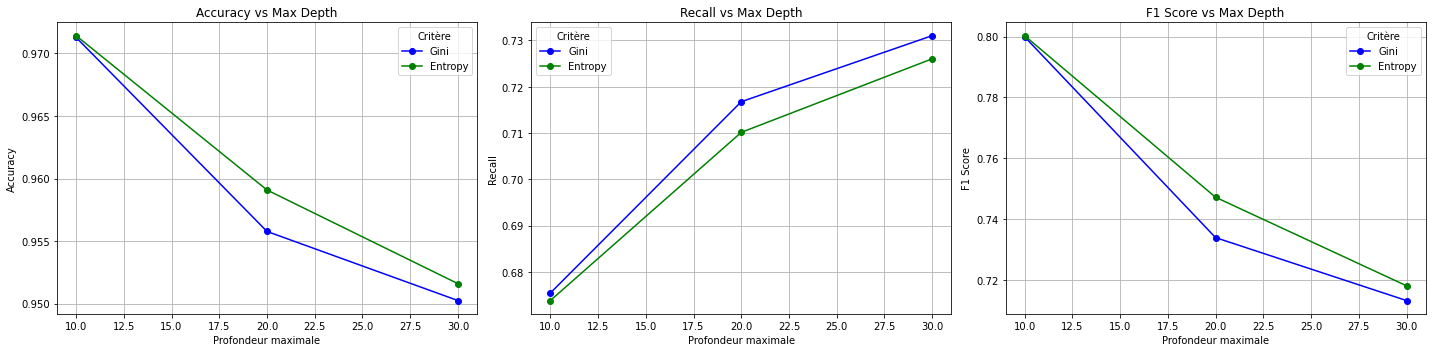

In [46]:
gini_accuracy_results = dt_cv_accuracy_results[dt_cv_accuracy_results['param_criterion'] == 'gini']
entropy_accuracy_results = dt_cv_accuracy_results[dt_cv_accuracy_results['param_criterion'] == 'entropy']
gini_recall_results = dt_cv_recall_results[dt_cv_accuracy_results['param_criterion'] == 'gini']
entropy_recall_results = dt_cv_recall_results[dt_cv_accuracy_results['param_criterion'] == 'entropy']
gini_f1_results = dt_cv_f1_results[dt_cv_accuracy_results['param_criterion'] == 'gini']
entropy_f1_results = dt_cv_f1_results[dt_cv_accuracy_results['param_criterion'] == 'entropy']

fig, axes = plt.subplots(1, 3, figsize=(20, 5))  

axes[0].plot(gini_accuracy_results['param_max_depth'], gini_accuracy_results['mean_test_score'], marker='o', label='Gini', color='blue')
axes[0].plot(entropy_accuracy_results['param_max_depth'], entropy_accuracy_results['mean_test_score'], marker='o', label='Entropy', color='green')
axes[0].set_title("Accuracy vs Max Depth")
axes[0].set_xlabel("Profondeur maximale")
axes[0].set_ylabel("Accuracy")
axes[0].legend(title="Critère")
axes[0].grid(True)


axes[1].plot(gini_recall_results['param_max_depth'], gini_recall_results['mean_test_score'], marker='o', label='Gini', color='blue')
axes[1].plot(entropy_recall_results['param_max_depth'], entropy_recall_results['mean_test_score'], marker='o', label='Entropy', color='green')
axes[1].set_title("Recall vs Max Depth")
axes[1].set_xlabel("Profondeur maximale")
axes[1].set_ylabel("Recall")
axes[1].legend(title="Critère")
axes[1].grid(True)

axes[2].plot(gini_f1_results['param_max_depth'], gini_f1_results['mean_test_score'], marker='o', label='Gini', color='blue')
axes[2].plot(entropy_f1_results['param_max_depth'], entropy_f1_results['mean_test_score'], marker='o', label='Entropy', color='green')
axes[2].set_title("F1 Score vs Max Depth")
axes[2].set_xlabel("Profondeur maximale")
axes[2].set_ylabel("F1 Score")
axes[2].legend(title="Critère")
axes[2].grid(True)

plt.tight_layout()
plt.show()


- ***LogisticRegression***


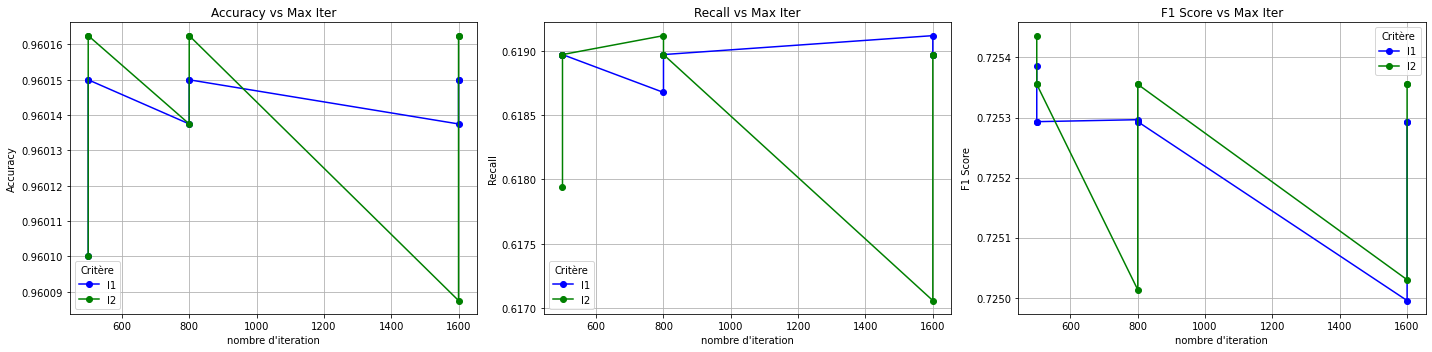

In [47]:
l1_accuracy_results = lr_cv_accuracy_results[lr_cv_accuracy_results['param_penalty'] == 'l1']
l2_accuracy_results = lr_cv_accuracy_results[lr_cv_accuracy_results['param_penalty'] == 'l2']
l1_recall_results = lr_cv_recall_results[lr_cv_recall_results['param_penalty'] == 'l1']
l2_recall_results = lr_cv_recall_results[lr_cv_recall_results['param_penalty'] == 'l2']
l1_f1_results = lr_cv_f1_results[lr_cv_f1_results['param_penalty'] == 'l1']
l2_f1_results = lr_cv_f1_results[lr_cv_f1_results['param_penalty'] == 'l2']

fig, axes = plt.subplots(1, 3, figsize=(20, 5))  

axes[0].plot(l1_accuracy_results['param_max_iter'], l1_accuracy_results['mean_test_score'], marker='o', label='l1', color='blue')
axes[0].plot(l2_accuracy_results['param_max_iter'], l2_accuracy_results['mean_test_score'], marker='o', label='l2', color='green')
axes[0].set_title("Accuracy vs Max Iter")
axes[0].set_xlabel("nombre d'iteration")
axes[0].set_ylabel("Accuracy")
axes[0].legend(title="Critère")
axes[0].grid(True)


axes[1].plot(l1_recall_results['param_max_iter'], l1_recall_results['mean_test_score'], marker='o', label='l1', color='blue')
axes[1].plot(l2_recall_results['param_max_iter'], l2_recall_results['mean_test_score'], marker='o', label='l2', color='green')
axes[1].set_title("Recall vs Max Iter")
axes[1].set_xlabel("nombre d'iteration")
axes[1].set_ylabel("Recall")
axes[1].legend(title="Critère")
axes[1].grid(True)

axes[2].plot(l1_f1_results['param_max_iter'], l1_f1_results['mean_test_score'], marker='o', label='l1', color='blue')
axes[2].plot(l2_f1_results['param_max_iter'], l2_f1_results['mean_test_score'], marker='o', label='l2', color='green')
axes[2].set_title("F1 Score vs Max Iter")
axes[2].set_xlabel("nombre d'iteration")
axes[2].set_ylabel("F1 Score")
axes[2].legend(title="Critère")
axes[2].grid(True)

plt.tight_layout()
plt.show()

- ***KNeighborsClassifier***


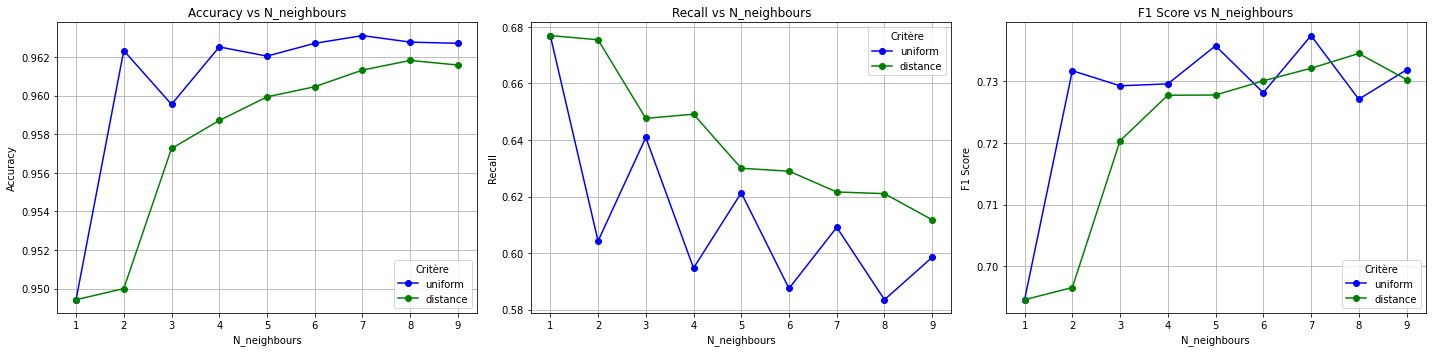

In [48]:
uniform_accuracy_results = knn_cv_accuracy_results[knn_cv_accuracy_results['param_weights'] == 'uniform']
distance_accuracy_results = knn_cv_accuracy_results[knn_cv_accuracy_results['param_weights'] == 'distance']
uniform_recall_results = knn_cv_recall_results[knn_cv_recall_results['param_weights'] == 'uniform']
distance_recall_results = knn_cv_recall_results[knn_cv_recall_results['param_weights'] == 'distance']
uniform_f1_results = knn_cv_f1_results[knn_cv_f1_results['param_weights'] == 'uniform']
distance_f1_results = knn_cv_f1_results[knn_cv_f1_results['param_weights'] == 'distance']

fig, axes = plt.subplots(1, 3, figsize=(20, 5))  

axes[0].plot(uniform_accuracy_results['param_n_neighbors'], uniform_accuracy_results['mean_test_score'], marker='o', label='uniform', color='blue')
axes[0].plot(distance_accuracy_results['param_n_neighbors'], distance_accuracy_results['mean_test_score'], marker='o', label='distance', color='green')
axes[0].set_title("Accuracy vs N_neighbours")
axes[0].set_xlabel("N_neighbours")
axes[0].set_ylabel("Accuracy")
axes[0].legend(title="Critère")
axes[0].grid(True)


axes[1].plot(uniform_recall_results['param_n_neighbors'], uniform_recall_results['mean_test_score'], marker='o', label='uniform', color='blue')
axes[1].plot(distance_recall_results['param_n_neighbors'], distance_recall_results['mean_test_score'], marker='o', label='distance', color='green')
axes[1].set_title("Recall vs N_neighbours")
axes[1].set_xlabel("N_neighbours")
axes[1].set_ylabel("Recall")
axes[1].legend(title="Critère")
axes[1].grid(True)

axes[2].plot(uniform_f1_results['param_n_neighbors'], uniform_f1_results['mean_test_score'], marker='o', label='uniform', color='blue')
axes[2].plot(distance_f1_results['param_n_neighbors'], distance_f1_results['mean_test_score'], marker='o', label='distance', color='green')
axes[2].set_title("F1 Score vs N_neighbours")
axes[2].set_xlabel("N_neighbours")
axes[2].set_ylabel("F1 Score")
axes[2].legend(title="Critère")
axes[2].grid(True)

plt.tight_layout()
plt.show()

- Spécifiez les valeurs par défaut de chaque hyperparamètre testé.

 **DecisionTreeClassifier default tested hyperparamters:**
- criterion='gini'
- max_depth=None

**LogisticRegression default tested hyperparamters:**
- penalty='l2'
- tol=0.0001
- max_iter=100
- solver='lbfgs'

**KNeighborsClassifier default tested hyperparamters:**
- n_neighbors=5
- weights='uniform'

- Analysez les résultats et offrez des perspectives sur les configurations d'hyperparamètres ayant obtenu les meilleures performances pour chaque modèle.

**DecisionTreeClassifier:**
- On remarque que la profondeur (max_depth) de l'arbre est inversement proportionelle a la performance du modele. C'est a dire quand la profendeur de l'arbre augmente, le modele devient moins precis. 
- Quand l'hyperparametre criterion = "Entropy", ce modele donne un meilleur resulat que quand criterion = 'gini' sur une intervalle fermee. Comme on peut voir le modele a a peu pres la meme performance quand criterion = 'gini' ou 'entropy' quand max_depth = 10 ou quand max_depth = 30. (On peut voir que les deux courbes 'gini' et 'entropy' convergent l'une a l'autre lorsque max_depth augmente)
- Meilleur performance : 'criterion': 'entropy', 'max_depth': 10

**LogisticRegression:**
- On remarque que la difference de choix d'hyperparamtre est negligeable pour ce modele. (variation maximale de 0.007% de precision).
- Meilleur peformance: 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.001

**KNeighborsClassifier**
- On remarque que le choix des hyperparametres pour ce modele est important comme ils ont plus d'effet sur la performance que les autres hyperparamtres des autres modeles.
- On voit un grand ajoux de performance/precision et f1 score lorsque on augmante la valeur de n_eighbors de 1 a 2 pour l'hyperparamtre weights ='uniforme' et lorsque on augmente la valeur de n_eighbors de 1 a 8 pour l'hyperparamtre weights ='distance'. Cependant, pour les deux valeurs de weights 'uniforme' et 'distance', le rappel dimunie significativent a chaque fois qu'on augmente n_neighbors.
- Meilleur performance : 'n_neighbors': 7, 'weights': 'uniform'

## Analyse des résultats

### 10. Comparaison des modèles :

- ***Comparez les résultats obtenus pour chaque modèle.***


Voici les résultats moyens de la validation croisée (cross-validation) pour chaque modèle avec les hyperparamètres par défaut :

In [49]:
resultats = {
    'Modèle': ['Arbre de décision', 'KNN', 'Régression logistique'],
    'Précision moyenne': [dt_scores[0], knn_scores[0], lr_scores[0]],
    'Rappel moyen': [dt_scores[1], knn_scores[1], lr_scores[1]],
    'Score F1 moyen': [dt_scores[2], knn_scores[2], lr_scores[2]]
}

df_results = pd.DataFrame(resultats)
df_results[['Précision moyenne', 'Rappel moyen', 'Score F1 moyen']] = df_results[['Précision moyenne', 'Rappel moyen', 'Score F1 moyen']].round(2)
print(df_results)

                  Modèle  Précision moyenne  Rappel moyen  Score F1 moyen
0      Arbre de décision               0.97          0.73            0.80
1                    KNN               0.96          0.68            0.74
2  Régression logistique               0.96          0.62            0.73


-***Discutez des différences observées dans les performances des modèles et fournissez des explications potentielles. Considérez des aspects tels que la complexité des modèles, le déséquilibre des données, le surapprentissage et l'impact du réglage des paramètres sur les résultats globaux.***

 - Arbre de décision : Ce modèle offre la meilleure combinaison de précision, rappel et F1-score avec un bon compromis. L’arbre de décision capture bien les exemples positifs (rappel de 0.73) tout en maintenant une haute précision (0.97). Cependant, comme les arbres de décision sont connus pour leur complexité et leur tendance à sur-apprendre (overfitting), les performances peuvent légèrement varier sur des données non vues.
 - K-Nearest Neighbors (KNN) : Bien que la précision soit élevée (0.96), le rappel (0.68) et le score F1 (0.74) sont plus bas que ceux de l’arbre de décision. Cela peut s'expliquer par la sensibilité du KNN aux données déséquilibrées, où les échantillons majoritaires influencent davantage les prédictions. De plus, le KNN devient moins efficace lorsque les données sont plus complexes et que des ajustements minutieux sont nécessaires.
 - Régression logistique : Ce modèle, bien que simple, présente des performances plus faibles en termes de rappel (0.62) et de score F1 (0.73). La régression logistique a tendance à bien fonctionner sur des problèmes linéaires, mais dans des situations où les données sont plus complexes ou non linéaires, elle peut échouer à capturer certaines relations entre les variables, ce qui explique le rappel plus faible.

-***Fournissez des recommandations sur le(s) modèle(s) à choisir pour cette tâche et justifiez vos choix en fonction des résultats de l'analyse.***


- Sur la base des résultats, je recommanderais d'utiliser l'arbre de decision pour cette tâche. Voici pourquoi :

L'arbre de decision offre un bon compromis entre la précision et le rappel, avec un score F1 le plus élevé.
L'équilibre des performances entre le rappel et la précision est particulièrement important pour une tâche où il est crucial d'identifier correctement les patients diabétiques.

-***Entraînez le(s) modèle(s) recommandé(s) en utilisant les valeurs optimales des paramètres identifiés lors de l'optimisation des paramètres. Appliquez ensuite le modèle entraîné aux données de test. Documentez vos observations de manière détaillée. Évaluez spécifiquement si les résultats dérivés de la validation croisée sont cohérents avec ceux obtenus sur le jeu de test.***

In [53]:
best_dt_model = DecisionTreeClassifier(criterion ='entropy', max_depth = 10)

best_dt_model.fit(X_train_preprocessed, y_train)

y_test_pred = best_dt_model.predict(X_test_preprocessed)

dt_precision = precision_score(y_test, y_test_pred)
dt_recall = recall_score(y_test, y_test_pred)
dt_f1 = f1_score(y_test, y_test_pred)
print(f"Précision: {dt_precision:.4f}, Rappel: {dt_recall:.4f}, Score F1: {dt_f1:.4f}")

Précision: 0.9805, Rappel: 0.6800, Score F1: 0.8031


Oui, les resultats qu'on a eu sont coherents avec les resultats de la validation croisee: 
- La precision est un peu meilleur. (0.98 > 0.97)
- Le rappel est legerment plus bas. (0.68 < 0.73)
- Le score F1 est le meme (0.80)

# 2. Documentation de l'analyse exploratoire

Le rapport doit documenter de manière complète le processus suivi pendant ce devoir. Le notebook Jupyter doit inclure les éléments suivants :

- Votre nom(s), numéro(s) d'étudiant.e.s et un titre de rapport.
- Expliquez comment les tâches ont été réparties entre les membres. Comment avez-vous fait en sorte que les deux personnes atteignent les objectifs d'apprentissage ?
- Une section pour chaque étape de l'analyse exploratoire, contenant le code Python pertinent et les explications ou résultats.
  - Pour les sections nécessitant du code Python, incluez le code dans une cellule.
  - Pour les sections nécessitant des explications ou des résultats, incluez-les dans une cellule distincte ou en combinaison avec les cellules de code.
- Assurez une séparation logique du code dans différentes cellules. Par exemple, la définition d'une fonction doit se trouver dans une cellule et son exécution dans une autre. Évitez de placer trop de code dans une seule cellule pour maintenir la clarté et la lisibilité.
- Le notebook que vous soumettez doit inclure les résultats de l'exécution, y compris les graphiques, en veillant à ce que l'assistant d'enseignement puisse évaluer le notebook sans avoir à exécuter le code.

# Ressources

## Articles


### Dealing with Outliers: [View Article](https://syedabis98.medium.com/dealing-with-outliers-in-data-science-techniques-and-best-practices-a08172643b7a)


---

## Documentation

### scikit-learn:
- [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- [cross_validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
- [ColumnTransformer](https://scikit-learn.org/1.5/modules/generated/sklearn.compose.ColumnTransformer.html)

### pandas:
- [User Guide](https://pandas.pydata.org/docs/user_guide/)

### numpy:
- [Introduction to NumPy](https://www.w3schools.com/python/numpy/numpy_intro.asp)

### seaborn:
- [Seaborn Documentation](https://seaborn.pydata.org)

### matplotlib:
- [Matplotlib Documentation](https://matplotlib.org)
